## Seaborn 

- Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. It is built on the top of __matplotlib__ library and also closely integrated to the data structures from __pandas__. Seaborn aims to make visualization the central part of exploring and understanding data. It provides dataset-oriented APIs, so that we can switch between different visual representations for same variables for better understanding of dataset.

__Different categories of plot in Seaborn__ 

- Plots are basically used for visualizing the relationship between variables. Those variables can be either be completely numerical or a category like a group, class or division. Seaborn divides plot into the below categories – 
 


        
|<center> Type |<center> Descritpion |
|----|--------|
|__Relational plots__ |<center>This plot is used to understand the relation between two variables.|
|__Categorical plots__|<center>This plot deals with categorical variables and how they can be visualized.|
|__Distribution plots__|<center>This plot is used for examining univariate and bivariate distributions.|
|__Regression plots__|<center>The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.|
|__Matrix plots__|<center>A matrix plot is an array of scatterplots.|
|__Multi-plot grids__|<center>It is an useful approach is to draw multiple instances of the same plot on different subsets of the dataset.|

<br>
<br>

#### Installtion

<br>
For Python Enviroment 
<li><b> pip install seaborn </b></li>
    
<br>
For Conda Enviroment 
<li><b> conda install seaborn </b></li>

__Sea Born is dependednt on follwoing libaires__

- Python 3.6+ 
- numpy  
- scipy 
- pandas
- matplotlib 
- statsmodel 


Lets Explore !

<br>

__Importing__

In [1]:
import seaborn as sns
%matplotlib inline

__Builtin Data__: Seaborn comes with built-in data sets.  

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

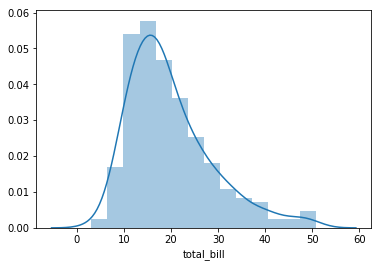

In [4]:
sns.distplot(tips['total_bill'])

To remove the kde layer and just have the histogram make __kde__ = False.
<br>
You can also set your bin value

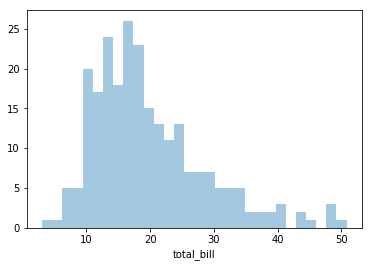

In [8]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

<br>
<br>
<br>


- __Scatter__

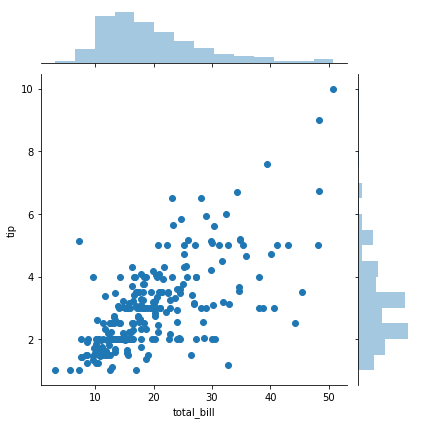

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

- __hex__

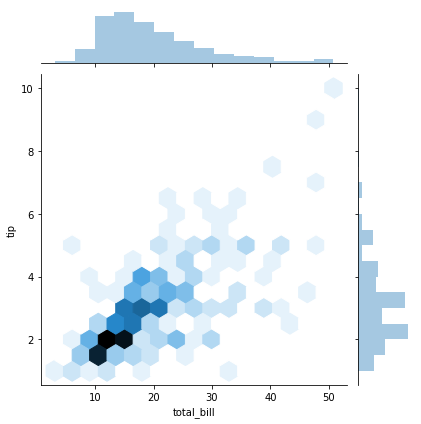

In [10]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

- __Reg__

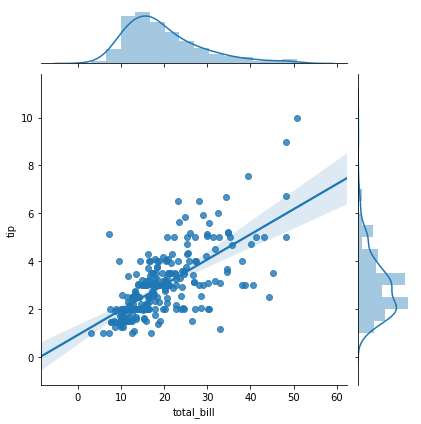

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

- __resid__

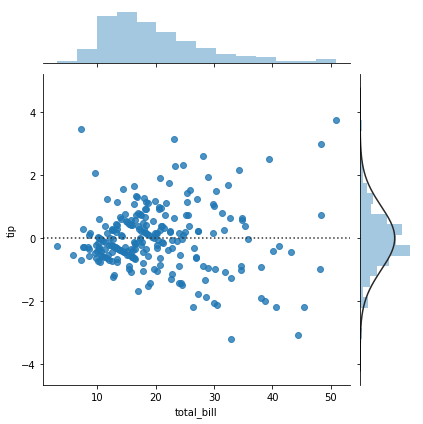

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')

- __kde__

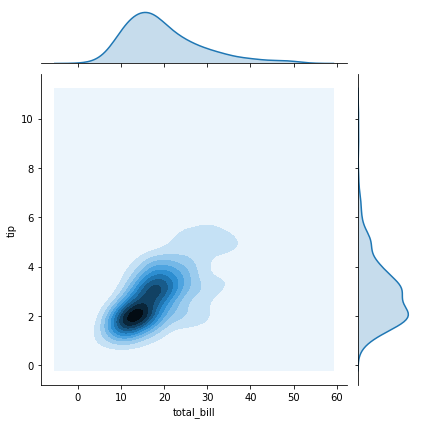

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

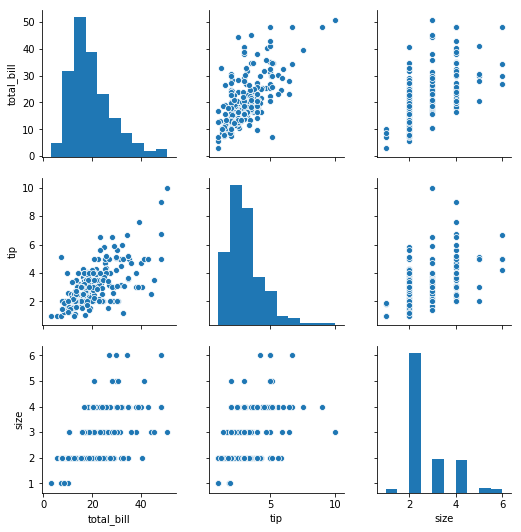

In [15]:
sns.pairplot(tips)

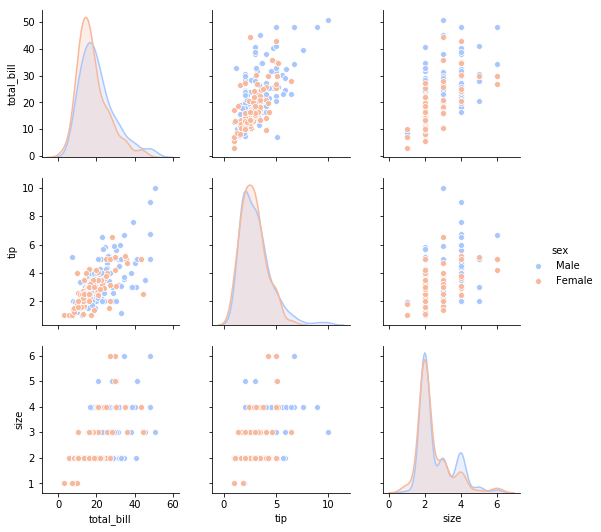

In [16]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

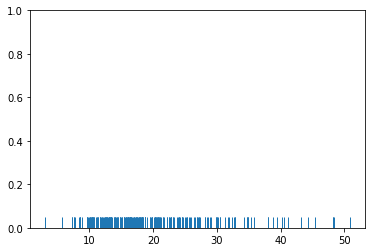

In [17]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

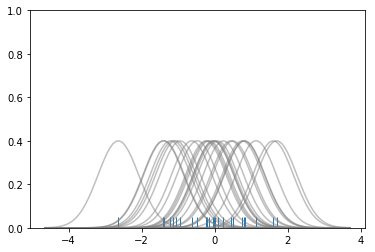

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

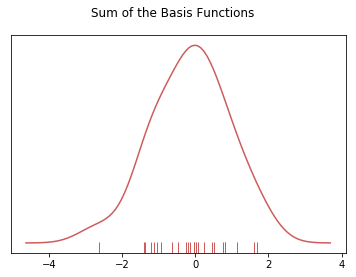

In [29]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

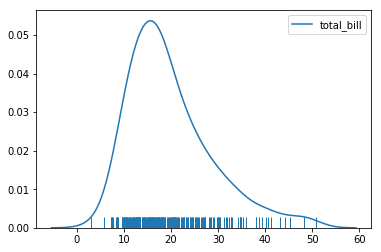

In [35]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

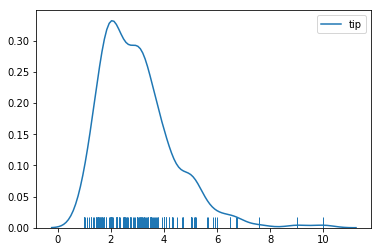

In [37]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])